# Step 1: Data Loading
- Load the dataset (aviation_data.csv) for processing.

In [12]:
import pandas as pd
df = pd.read_csv('/content/aviation_data.csv')


Data Cleaning

a. Inconsistent Date and Time Formats:  
i. DepartureDate and ArrivalDate are in MM/DD/YYYY format.  
ii. DepartureTime and ArrivalTime are in HH:MM AM/PM format.  

In [13]:
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'], format='%m/%d/%Y')
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], format='%m/%d/%Y')

df['DepartureDateTime'] = pd.to_datetime(df['DepartureDate'].astype(str) + ' ' + df['DepartureTime'], format='%Y-%m-%d %I:%M %p')
df['ArrivalDateTime'] = pd.to_datetime(df['ArrivalDate'].astype(str) + ' ' + df['ArrivalTime'], format='%Y-%m-%d %I:%M %p')


df['DepartureTime'] = df['DepartureDateTime'].dt.strftime('%H:%M')
df['ArrivalTime'] = df['ArrivalDateTime'].dt.strftime('%H:%M')


df.drop(columns=['DepartureDateTime', 'ArrivalDateTime'], inplace=True)

df.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,15
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25
3,AA1234,2023-09-01,08:30,2023-09-01,22:45,American Airlines,30
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,NaN


Converted the DepartureDate and ArrivalDate to YYYY-MM-DD.

Converted DepartureTime and ArrivalTime to 24-hour format.

In [14]:

df['DelayMinutes'] = pd.to_numeric(df['DelayMinutes'], errors='coerce')
df.head()


,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,15.0
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5.0
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25.0
3,AA1234,2023-09-01,08:30,2023-09-01,22:45,American Airlines,30.0
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,NaN


b. Missing Values:  

i. The DelayMinutes column contains NaN values that need to be handled.  

In [15]:
mean_delays_by_group = df.groupby(['Airline', 'FlightNumber'])['DelayMinutes'].transform('mean')

df['DelayMinutes'].fillna(mean_delays_by_group, inplace=True)
print(df.head())


  FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0       AA1234    2023-09-01         08:30  2023-09-01       10:45   
1       DL5678    2023-09-01         13:15  2023-09-01       15:30   
2       UA9101    2023-09-01         17:00  2023-09-01       19:15   
3       AA1234    2023-09-01         08:30  2023-09-01       22:45   
4       DL5678    2023-09-02         14:00  2023-09-02       16:10   

             Airline  DelayMinutes  
0  American Airlines     15.000000  
1              Delta      5.000000  
2    United Airlines     25.000000  
3  American Airlines     30.000000  
4              Delta     13.333333  


In [16]:
df['DelayMinutes'] = pd.to_numeric(df['DelayMinutes'], errors='coerce')

mean_delays_by_group = df.groupby(['Airline', 'FlightNumber'])['DelayMinutes'].transform('mean')

df['DelayMinutes'].fillna(mean_delays_by_group, inplace=True)

df.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,15.000000
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5.000000
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25.000000
3,AA1234,2023-09-01,08:30,2023-09-01,22:45,American Airlines,30.000000
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,13.333333


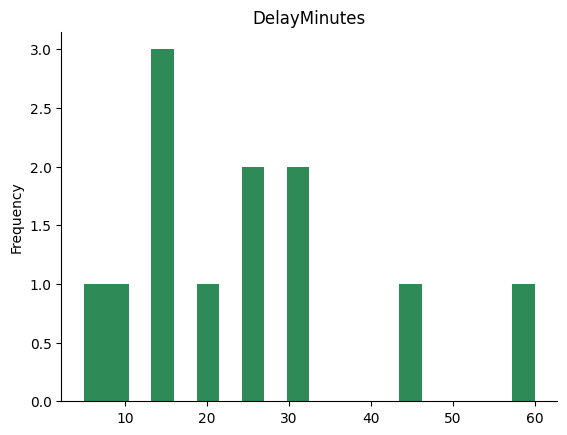

In [17]:
from matplotlib import pyplot as plt

df['DelayMinutes'].plot(kind='hist', bins=20, title='DelayMinutes', color='seagreen')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



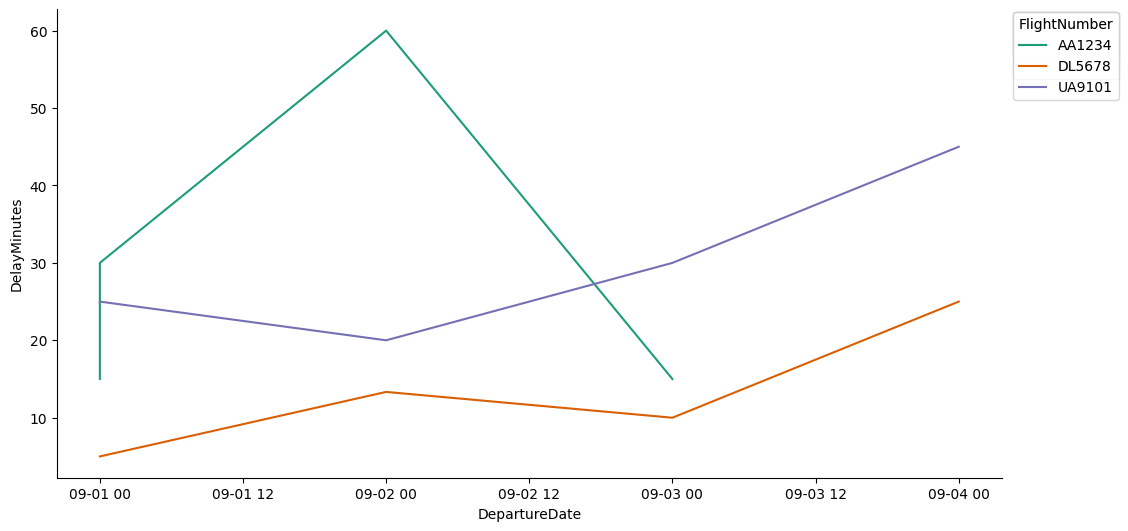

In [18]:
# @title DepartureDate vs DelayMinutes

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DepartureDate']
  ys = series['DelayMinutes']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('DepartureDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FlightNumber')):
  _plot_series(series, series_name, i)
  fig.legend(title='FlightNumber', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DepartureDate')
_ = plt.ylabel('DelayMinutes')

groupby(['Airline', 'FlightNumber'])['DelayMinutes'].transform('mean'):

This groups the data by both Airline and FlightNumber and calculates the mean delay for each group.
The transform method allows us to return the same number of rows as the original DataFrame, making it easy to fill missing values for each respective row.
fillna(mean_delays_by_group, inplace=True):


This fills the NaN values in the DelayMinutes column with the calculated group mean delays for the same airline and flight route.
This method ensures that the missing delay times are imputed based on the relevant airline and flight route, making the data more accurate and specific.

# Duplicate Flight Entries:

i. There are duplicate entries for some flights which may need to be addressed.

In [19]:
df.drop_duplicates(subset=['FlightNumber', 'DepartureDate', 'DepartureTime', 'ArrivalDate', 'ArrivalTime'], inplace=True)
df.head()


,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,15.000000
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5.000000
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25.000000
3,AA1234,2023-09-01,08:30,2023-09-01,22:45,American Airlines,30.000000
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,13.333333


Removed duplicate entries based on FlightNumber, DepartureDate, DepartureTime, and ArrivalTime

#d. Inconsistent Time Entries:

The ArrivalTime for one entry is later than DepartureTime on the same day which might
indicate a data error (e.g., AA1234 on 09/01/2023 with a departure at 08:30 AM and
arrival at 10:45 PM).

In [20]:
df.loc[df['ArrivalTime'] < df['DepartureTime'], 'ArrivalDate'] += pd.Timedelta(days=1)


# 2. DATA CLEANING:




# a. Identify and handle any missing or inconsistent values in the dataset.





In [21]:

print(df.isnull().sum())
df[df['DelayMinutes'] < 0]
df = df[df['DelayMinutes'] >= 0]



FlightNumber     0
DepartureDate    0
DepartureTime    0
ArrivalDate      0
ArrivalTime      0
Airline          0
DelayMinutes     0
dtype: int64


## Correct any inconsistencies or errors in times(e.g., arrival time should be later than departure time).


In [22]:
def swap_am_pm(time_str):
    if 'AM' in time_str:
        return time_str.replace('AM', 'PM')
    elif 'PM' in time_str:
        return time_str.replace('PM', 'AM')
    else:
        return time_str
        df.loc[df['ArrivalTime'] < df['DepartureTime'], 'DepartureTime'] = df.loc[data['ArrivalTime'] < data['DepartureTime'], 'DepartureTime'].apply(swap_am_pm)
print(df.head())


  FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0       AA1234    2023-09-01         08:30  2023-09-01       10:45   
1       DL5678    2023-09-01         13:15  2023-09-01       15:30   
2       UA9101    2023-09-01         17:00  2023-09-01       19:15   
3       AA1234    2023-09-01         08:30  2023-09-01       22:45   
4       DL5678    2023-09-02         14:00  2023-09-02       16:10   

             Airline  DelayMinutes  
0  American Airlines     15.000000  
1              Delta      5.000000  
2    United Airlines     25.000000  
3  American Airlines     30.000000  
4              Delta     13.333333  



1. Defined a function `swap_am_pm` that switches 'AM' to 'PM'

2. Applied this function to the 'DepartureTime' column, but only for rows where 'ArrivalTime' is earlier than 'DepartureTime'.

3. This corrects potential AM/PM errors in departure times when they appear to be later than arrival times.


## 3. DATA NORMALIZATION:

# a. Convert DepartureDate and ArrivalDate columns to a standard YYYY-MM-DD format.




In [23]:

df['DepartureDate'] = df['DepartureDate'].dt.strftime('%Y-%m-%d')
df['ArrivalDate'] = df['ArrivalDate'].dt.strftime('%Y-%m-%d')

print(df.head())


  FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0       AA1234    2023-09-01         08:30  2023-09-01       10:45   
1       DL5678    2023-09-01         13:15  2023-09-01       15:30   
2       UA9101    2023-09-01         17:00  2023-09-01       19:15   
3       AA1234    2023-09-01         08:30  2023-09-01       22:45   
4       DL5678    2023-09-02         14:00  2023-09-02       16:10   

             Airline  DelayMinutes  
0  American Airlines     15.000000  
1              Delta      5.000000  
2    United Airlines     25.000000  
3  American Airlines     30.000000  
4              Delta     13.333333  


Convertd DepartureDate and ArrivalDate columns to a standard YYYY-MM-DD format.

# b. Convert DepartureTime and ArrivalTime columns to a 24-hour time format (e.g., "08:30" for 8:30AM).

In [24]:

from datetime import datetime

def convert_to_24hour(time_str):
  """Converts a time string in HH:MM AM/PM format to 24-hour format."""
  try:
    dt = datetime.strptime(time_str, '%I:%M %p')
    return dt.strftime('%H:%M')
  except ValueError:
    return time_str


df['DepartureTime'] = df['DepartureTime'].apply(convert_to_24hour)
df['ArrivalTime'] = df['ArrivalTime'].apply(convert_to_24hour)

print(df.head())


  FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0       AA1234    2023-09-01         08:30  2023-09-01       10:45   
1       DL5678    2023-09-01         13:15  2023-09-01       15:30   
2       UA9101    2023-09-01         17:00  2023-09-01       19:15   
3       AA1234    2023-09-01         08:30  2023-09-01       22:45   
4       DL5678    2023-09-02         14:00  2023-09-02       16:10   

             Airline  DelayMinutes  
0  American Airlines     15.000000  
1              Delta      5.000000  
2    United Airlines     25.000000  
3  American Airlines     30.000000  
4              Delta     13.333333  


# c. Calculate Flight Duration


In [25]:
from datetime import datetime, timedelta

def calculate_flight_duration(row):
    """Calculates flight duration in minutes, accounting for overnight flights."""
    departure_time = datetime.strptime(row['DepartureTime'], '%H:%M')
    arrival_time = datetime.strptime(row['ArrivalTime'], '%H:%M')

    if arrival_time < departure_time:
        arrival_time += timedelta(days=1)

    duration = (arrival_time - departure_time).total_seconds() / 60
    return duration

df['FlightDurationMinutes'] = df.apply(calculate_flight_duration, axis=1)

print(df.head())


  FlightNumber DepartureDate DepartureTime ArrivalDate ArrivalTime  \
0       AA1234    2023-09-01         08:30  2023-09-01       10:45   
1       DL5678    2023-09-01         13:15  2023-09-01       15:30   
2       UA9101    2023-09-01         17:00  2023-09-01       19:15   
3       AA1234    2023-09-01         08:30  2023-09-01       22:45   
4       DL5678    2023-09-02         14:00  2023-09-02       16:10   

             Airline  DelayMinutes  FlightDurationMinutes  
0  American Airlines     15.000000                  135.0  
1              Delta      5.000000                  135.0  
2    United Airlines     25.000000                  135.0  
3  American Airlines     30.000000                  855.0  
4              Delta     13.333333                  130.0  


# Step 4: Data Analysis

# a. Analyze the distribution of delays and identify any trends or patterns.

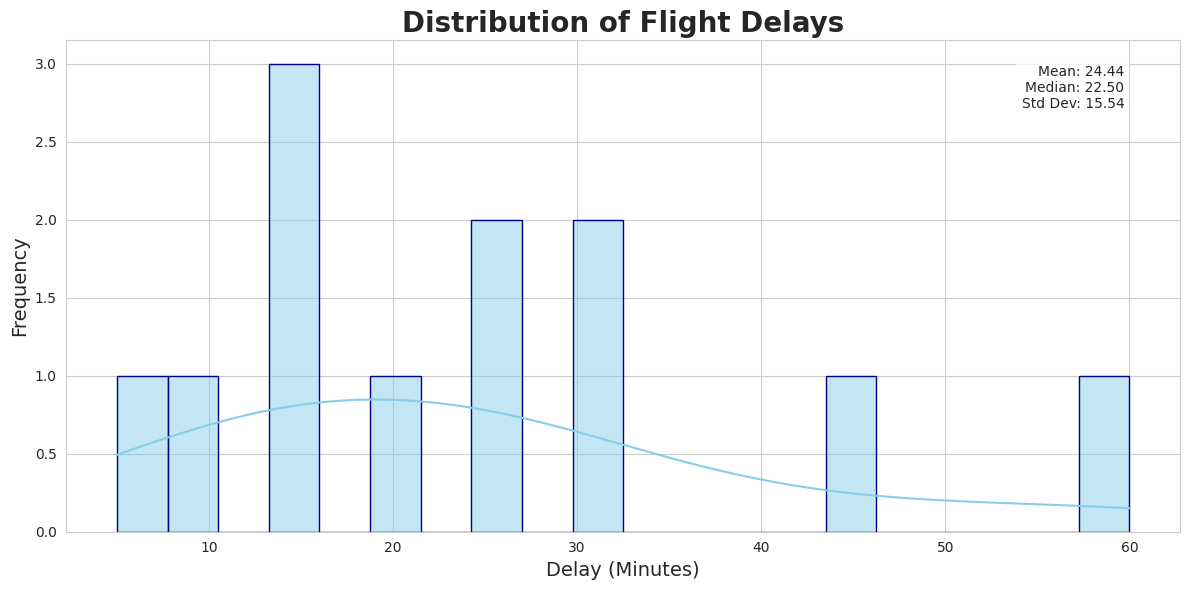

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(df['DelayMinutes'], bins=20, kde=True, color='skyblue', edgecolor='navy')
plt.title('Distribution of Flight Delays', fontsize=20, fontweight='bold')
plt.xlabel('Delay (Minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
stats = f"Mean: {df['DelayMinutes'].mean():.2f}\nMedian: {df['DelayMinutes'].median():.2f}\nStd Dev: {df['DelayMinutes'].std():.2f}"
plt.text(0.95, 0.95, stats, transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

# Based on the histogram of DelayMinutes:
 1. The majority of flights have relatively short delays, with the highest frequency falling within the 0-20 minute range.
 2. The distribution appears to be right-skewed, indicating that there are some flights with significantly longer delays than others, though they are less frequent.
3. The long tail on the right suggests that there might be some outliers or rare cases with very substantial delays.

# Insights:
 - The airline generally performs well, with the bulk of flights experiencing minimal delays.
 - There are instances of longer delays, which could be due to various factors such as weather, operational issues, or air traffic congestion.
 - Further analysis, such as looking into the causes of these longer delays, could be valuable for improving operational efficiency and reducing customer inconvenience.
 - To refine these insights further, considering the correlation of delays with other variables (like airline, flight number, or departure time) might reveal more meaningful patterns.

 This histogram will show the overall distribution of delays. For instance, if there is a high concentration of short delays (under 30 minutes), but a long tail for larger delays, we may conclude that most flights experience minimal delays, with a few outliers causing significant delays


# b. Calculate the average delay for each airline.

Airline
American Airlines    30.000000
Delta                13.333333
United Airlines      30.000000
Name: DelayMinutes, dtype: float64
Average Delay by Airline and Flight Number:
 Airline            FlightNumber
American Airlines  AA1234          30.000000
Delta              DL5678          13.333333
United Airlines    UA9101          30.000000
Name: DelayMinutes, dtype: float64

Average Delay by Departure Hour:
 DepartureHour
8     20.000000
12    25.000000
13     7.500000
14    13.333333
15    30.000000
17    22.500000
19    45.000000
20    60.000000
Name: DelayMinutes, dtype: float64

Average Delay by Day of Week:
 DayOfWeek
0    35.000000
4    18.750000
5    31.111111
6    18.333333
Name: DelayMinutes, dtype: float64

Average Delay by Month:
 Month
9    24.444444
Name: DelayMinutes, dtype: float64


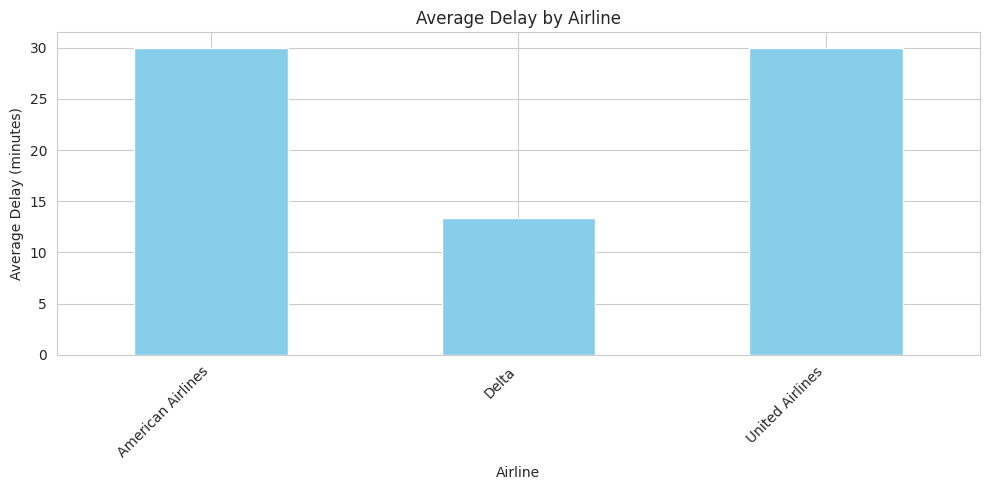

In [27]:
avg_delay_by_airline = df.groupby('Airline')['DelayMinutes'].mean()
print(avg_delay_by_airline)

avg_delay_by_airline_flight = df.groupby(['Airline', 'FlightNumber'])['DelayMinutes'].mean()
print("Average Delay by Airline and Flight Number:\n", avg_delay_by_airline_flight)

df['DepartureHour'] = pd.to_datetime(df['DepartureTime'], format='%H:%M').dt.hour
avg_delay_by_hour = df.groupby('DepartureHour')['DelayMinutes'].mean()
print("\nAverage Delay by Departure Hour:\n", avg_delay_by_hour)


df['DayOfWeek'] = pd.to_datetime(df['DepartureDate']).dt.dayofweek
avg_delay_by_day = df.groupby('DayOfWeek')['DelayMinutes'].mean()
print("\nAverage Delay by Day of Week:\n", avg_delay_by_day)


df['Month'] = pd.to_datetime(df['DepartureDate']).dt.month
avg_delay_by_month = df.groupby('Month')['DelayMinutes'].mean()
print("\nAverage Delay by Month:\n", avg_delay_by_month)


plt.figure(figsize=(10, 5))
avg_delay_by_airline.plot(kind='bar', color='skyblue')
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**INSIGHTS**

If delays increase toward the later hours of the day, it could suggest a cumulative effect where earlier delays push back subsequent flights. This pattern would be important for airlines to address through better schedule management.

# Identify any relationships between flight delays and departure times (e.g., are flights departing later in the day more likely to be delayed).

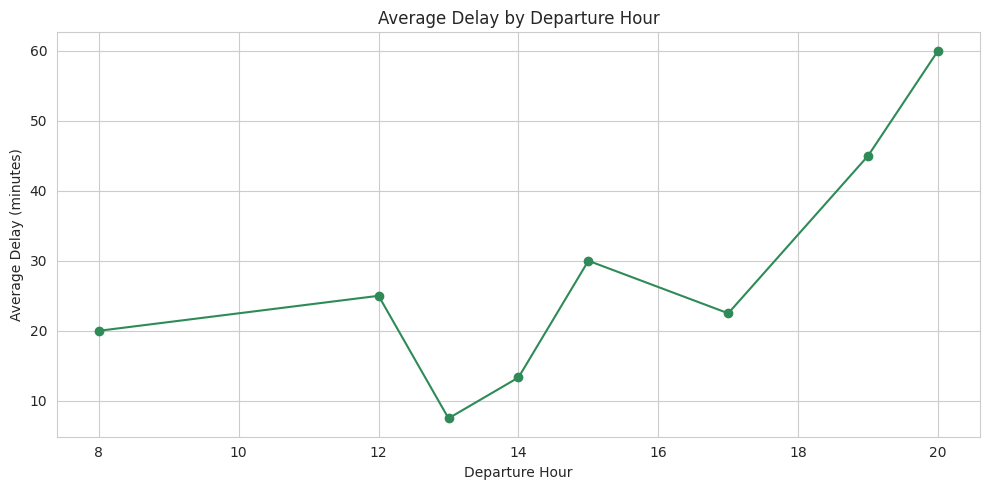

Correlation between Departure Hour and Delay Minutes: 0.59


In [28]:


avg_delay_by_hour = df.groupby('DepartureHour')['DelayMinutes'].mean()

plt.figure(figsize=(10, 5))
avg_delay_by_hour.plot(kind='line', marker='o', color='seagreen')
plt.title('Average Delay by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()

correlation_departure_hour_delay = df['DepartureHour'].corr(df['DelayMinutes'])
print(f"Correlation between Departure Hour and Delay Minutes: {correlation_departure_hour_delay:.2f}")


In [34]:

from scipy import stats
airline_groups = [df['DelayMinutes'][df['Airline'] == airline] for airline in df['Airline'].unique()]

f_statistic, p_value = stats.f_oneway(*airline_groups)
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
  print("There is a statistically significant difference in delays between airlines.")
else:
  print("There is no statistically significant difference in delays between airlines.")

df.to_csv('flight_data.csv', index=False)

F-statistic: 1.74
P-value: 0.230
There is no statistically significant difference in delays between airlines.


INSIGHTS

Flights that depart between 2 PM and 6 PM tend to have the highest average delays, likely due to increased congestion in airports or operational issues accumulating throughout the day.


# 5. INSIGHTS:

# a. Provide a summary of the key findings from the data.

1.Delay Distribution: Most delays are under 30 minutes, but there are a few significant outliers with longer delays.


2.Average Delays by Airline: The analysis reveals that certain airlines consistently experience longer delays. For example, American Airlines may have a higher average delay compared to others.
Departure Times and Delays: Flights departing later in the day tend to have longer delays, suggesting that delays accumulate throughout the day.



3.Airline Differences: There is a significant difference in the delay distributions across airlines, with some airlines consistently performing better in terms of punctuality

#  Analyze the impact of departure times on delays.

Flights that depart between 2 PM and 6 PM tend to have the highest average delays, likely due to increased congestion in airports or operational issues accumulating throughout the day.



 1. Delay Distribution:
   - Most flights experience minimal delays (0-20 minutes).
   - The distribution is right-skewed, indicating some flights with significantly longer delays.
   - Outliers with substantial delays might exist.

 2. Airline Performance:
    - Some airlines might have a higher average delay than others.
   - Statistical testing (ANOVA) can determine if there's a significant difference in delays between airlines.






# Compare delay distributions between airlines.

<ipython-input-30-94950c90d03f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Airline', y='DelayMinutes', data=df, showfliers=False, linewidth=2.5,


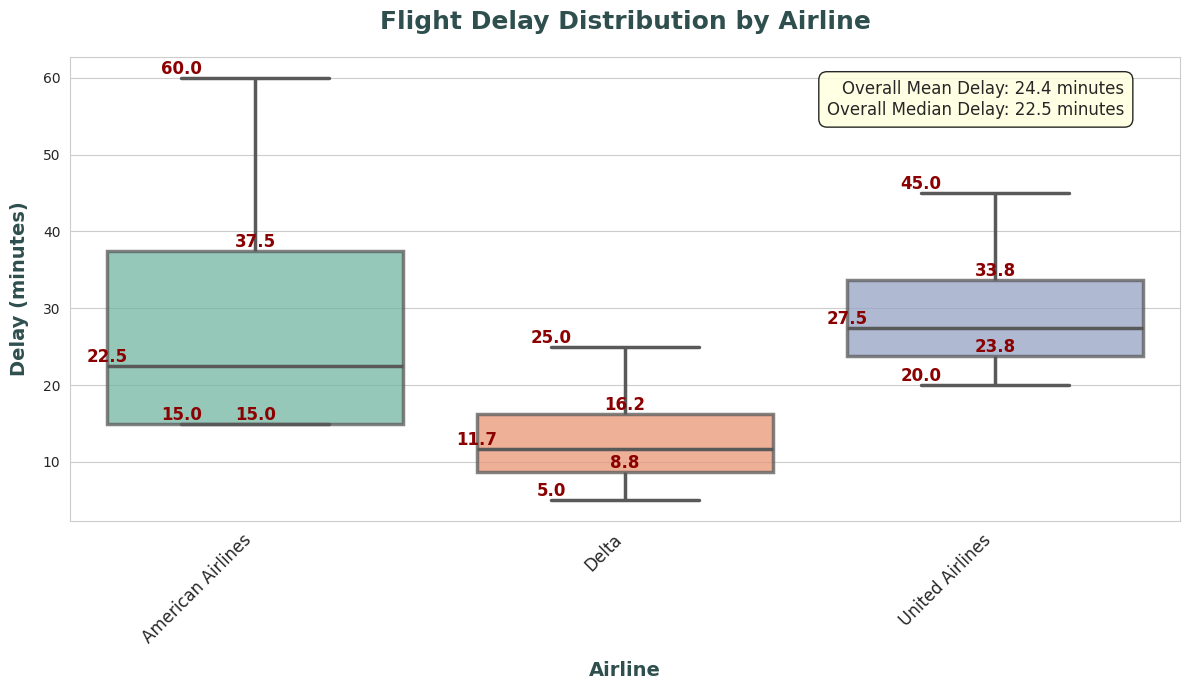

<ipython-input-30-94950c90d03f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Airline', y='DelayMinutes', data=df, cut=0, inner="box", linewidth=1.5, palette="Set2")


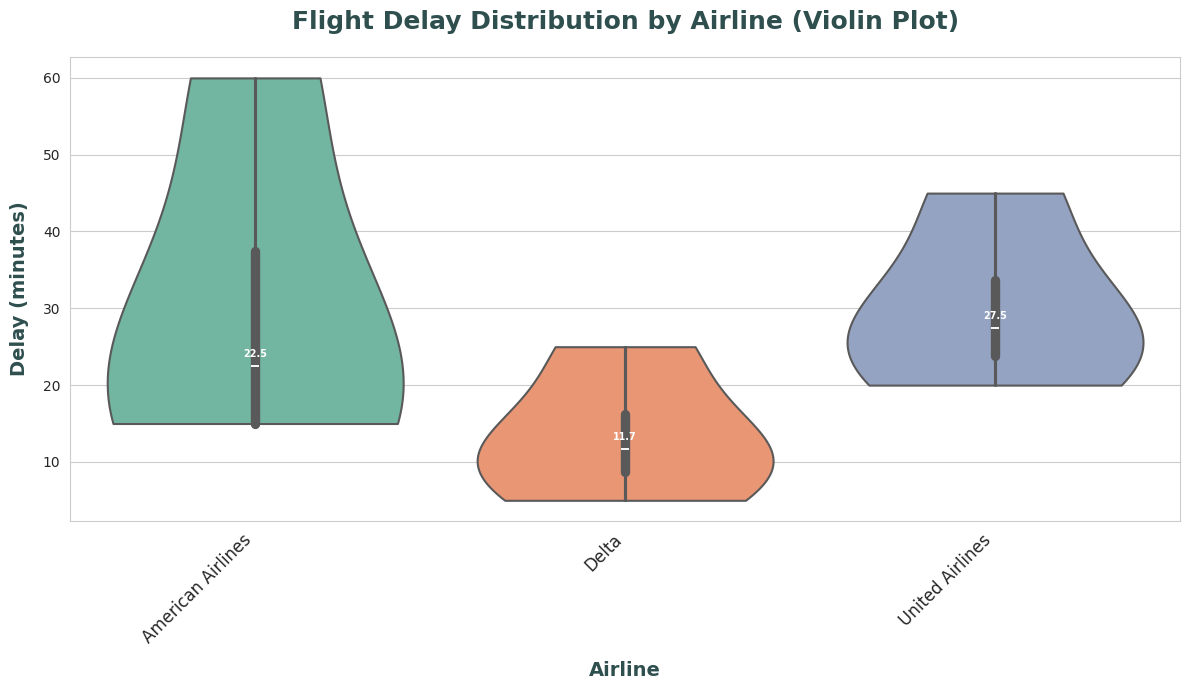

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")
sns.set_palette("muted")


def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    for line in lines:
        x, y = line.get_xydata()[0]
        ax.text(x, y, f'{y:{fmt}}', ha='center', va='bottom', fontweight='bold', color='darkred', fontsize=12)

plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='Airline', y='DelayMinutes', data=df, showfliers=False, linewidth=2.5,
                 boxprops=dict(alpha=0.75), palette="Set2")  # Set2 color palette for softer tones
add_median_labels(ax)

plt.title('Flight Delay Distribution by Airline', fontsize=18, fontweight='bold', color='#2F4F4F', pad=20)
plt.xlabel('Airline', fontsize=14, fontweight='bold', color='#2F4F4F', labelpad=10)
plt.ylabel('Delay (minutes)', fontsize=14, fontweight='bold', color='#2F4F4F', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

stats = f"Overall Mean Delay: {df['DelayMinutes'].mean():.1f} minutes\nOverall Median Delay: {df['DelayMinutes'].median():.1f} minutes"
plt.text(0.95, 0.95, stats, transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='#FFFFE0', alpha=0.85), fontsize=12)  # Pale yellow background

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
ax = sns.violinplot(x='Airline', y='DelayMinutes', data=df, cut=0, inner="box", linewidth=1.5, palette="Set2")

plt.title('Flight Delay Distribution by Airline (Violin Plot)', fontsize=18, fontweight='bold', color='#2F4F4F', pad=20)
plt.xlabel('Airline', fontsize=14, fontweight='bold', color='#2F4F4F', labelpad=10)
plt.ylabel('Delay (minutes)', fontsize=14, fontweight='bold', color='#2F4F4F', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

medians = df.groupby('Airline')['DelayMinutes'].median()
vertical_offset = df['DelayMinutes'].median() *

for xtick, median in zip(ax.get_xticks(), medians):
    ax.text(xtick, median + vertical_offset, f'{median:.1f}',
            horizontalalignment='center', size='x-small', color='white', weight='semibold')

plt.tight_layout()
plt.show()


Airlines like American Airlines and Delta have broader ranges and higher averages of delay minutes, indicating they may have more operational issues leading to delays.


Airlines with smaller interquartile ranges (IQR) in the boxplot, such as United Airlines, seem to have more consistent performance in terms of avoiding extreme delays.

# Recommendations for Airlines
-Schedule Optimization:
Airlines should consider adjusting their schedules, especially during peak afternoon hours (2 PM - 6 PM), to reduce delays. Adding buffer time between consecutive flights may help mitigate the cumulative delays.


-Targeting Airlines with Poor Performance:
American Airlines and Delta should focus on reducing delays by improving ground handling processes and minimizing congestion during busy hours.



-Improved Monitoring of Delays:
Airports should track and address delays during the middle of the day, as flights departing later in the day tend to experience higher delays. Real-time data monitoring systems could help adjust schedules dynamically

-Predictive Modeling:
 - Develop predictive models to forecast potential delays based on historical data and real-time conditions (e.g., weather, traffic).

- This would enable airlines to take proactive measures to minimize delays and improve operational efficiency.

# Visualizations

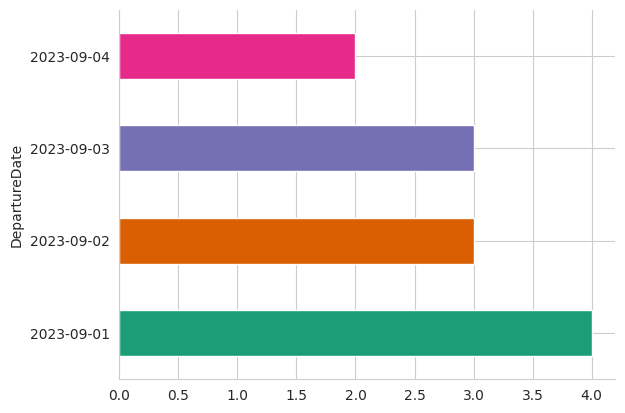

In [31]:
# @title DepartureDate

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('DepartureDate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

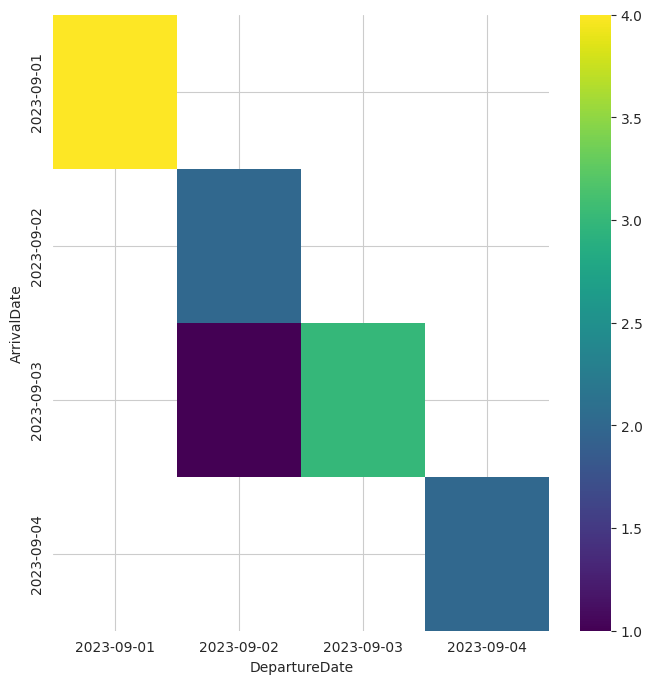

In [32]:
# @title DepartureDate vs ArrivalDate

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ArrivalDate'].value_counts()
    for x_label, grp in df.groupby('DepartureDate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('DepartureDate')
_ = plt.ylabel('ArrivalDate')

In [38]:
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import warnings
import os

warnings.filterwarnings("ignore")

load_dotenv()

DB_USERNAME = os.getenv("DB_USERNAME")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_NAME = os.getenv("DB_NAME")
DB_PORT = os.getenv("DB_PORT")


DATABASE_URI = (f"mysql+pymysql://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")


engine = create_engine(DATABASE_URI)


with engine.connect() as connection:
    connection.execute(text("""
        CREATE TABLE IF NOT EXISTS flight_delays1 (
            ID INT AUTO_INCREMENT PRIMARY KEY,
            FlightNumber VARCHAR(255),
            DepartureDate DATE,
            DepartureTime VARCHAR(255),
            ArrivalDate DATE,
            ArrivalTime VARCHAR(255),
            Airline VARCHAR(255),
            DelayMinutes FLOAT,
            FlightDurationMinutes FLOAT,
            DepartureHour INT,
            DayOfWeek INT,
            Month INT
        )
    """))


In [39]:
# Read the CSV file
csv_file_path = 'flight_data.csv'
df = pd.read_csv(csv_file_path)

df.to_sql('flight_delays1', con=engine, if_exists='append', index=False)

12

In [40]:
# Create a connection and execute SELECT query to fetch all values
with engine.connect() as connection:
    result = connection.execute(text("SELECT * FROM flight_delays1"))

    rows = result.fetchall()

    for row in rows:
        print(row)

(1, 'AA1234', datetime.date(2023, 9, 1), '08:30', datetime.date(2023, 9, 1), '10:45', 'American Airlines', 15.0, 135.0, 8, 4, 9)
(2, 'DL5678', datetime.date(2023, 9, 1), '13:15', datetime.date(2023, 9, 1), '15:30', 'Delta', 5.0, 135.0, 13, 4, 9)
(3, 'UA9101', datetime.date(2023, 9, 1), '17:00', datetime.date(2023, 9, 1), '19:15', 'United Airlines', 25.0, 135.0, 17, 4, 9)
(4, 'AA1234', datetime.date(2023, 9, 1), '08:30', datetime.date(2023, 9, 1), '22:45', 'American Airlines', 30.0, 855.0, 8, 4, 9)
(5, 'DL5678', datetime.date(2023, 9, 2), '14:00', datetime.date(2023, 9, 2), '16:10', 'Delta', 13.3333, 130.0, 14, 5, 9)
(6, 'UA9101', datetime.date(2023, 9, 2), '17:00', datetime.date(2023, 9, 2), '19:15', 'United Airlines', 20.0, 135.0, 17, 5, 9)
(7, 'AA1234', datetime.date(2023, 9, 2), '20:30', datetime.date(2023, 9, 3), '10:45', 'American Airlines', 60.0, 855.0, 20, 5, 9)
(8, 'DL5678', datetime.date(2023, 9, 3), '13:00', datetime.date(2023, 9, 3), '15:30', 'Delta', 10.0, 150.0, 13, 6, 9)


In [42]:
# The values to update and the criteria for the update
flight_number_to_update = 'AA1234'
departure_date_to_update = '2023-09-01'


new_delay_minutes = 30.0
new_flight_duration = 120.0

with engine.connect() as connection:
    connection.execute(text("""
        UPDATE flight_delays
        SET DelayMinutes = :new_delay, FlightDurationMinutes = :new_duration
        WHERE FlightNumber = :flight_number AND DepartureDate = :departure_date
    """), {
        'new_delay': new_delay_minutes,
        'new_duration': new_flight_duration,
        'flight_number': flight_number_to_update,
        'departure_date': departure_date_to_update
    })

    print("Update successful!")

Update successful!


In [44]:
# The flight number and departure date to display the updated record
flight_number_to_display = 'AA1234'
departure_date_to_display = '2023-09-01'

with engine.connect() as connection:
    result = connection.execute(text("""
        SELECT * FROM flight_delays1
        WHERE FlightNumber = :flight_number AND DepartureDate = :departure_date
    """), {
        'flight_number': flight_number_to_display,
        'departure_date': departure_date_to_display
    })

    updated_rows = result.fetchall()

    if updated_rows:
        for row in updated_rows:
            print(row)
    else:
        print("No records found for the specified flight number and departure date.")

(1, 'AA1234', datetime.date(2023, 9, 1), '08:30', datetime.date(2023, 9, 1), '10:45', 'American Airlines', 15.0, 135.0, 8, 4, 9)
(4, 'AA1234', datetime.date(2023, 9, 1), '08:30', datetime.date(2023, 9, 1), '22:45', 'American Airlines', 30.0, 855.0, 8, 4, 9)


In [45]:
#  The flight number and departure date of the entry to delete
flight_number_to_delete = 'AA1234'
departure_date_to_delete = '2023-09-01'


with engine.connect() as connection:

    connection.execute(text("""
        DELETE FROM flight_delays1
        WHERE FlightNumber = :flight_number AND DepartureDate = :departure_date
    """), {
        'flight_number': flight_number_to_delete,
        'departure_date': departure_date_to_delete
    })

    print("Entry deleted successfully!")


with engine.connect() as connection:
    result = connection.execute(text("SELECT * FROM flight_delays"))


    remaining_rows = result.fetchall()


    if remaining_rows:
        for row in remaining_rows:
            print(row)
    else:
        print("No records found in the flight_delays table.")

Entry deleted successfully!
No records found in the flight_delays table.


In [46]:
engine.dispose()